# **Resolução por: Isaac Machado**

# 📊 **Análise para Maximização de Lucro na Próxima Campanha de Marketing**

## **Categorias de Produtos Vendidos:**

- **Wines:** Vinhos
- **Rare meat products:** Carnes raras
- **Exotic fruits:** Frutas exóticas
- **Specially prepared fish:** Peixes preparados
- **Sweet products:** Produtos doces

### **Outras Categorias:**
- **Gold:** Produtos de ouro
- **Regular products:** Produtos regulares

---

## **Canais de Vendas:**

- **Physical stores:** Lojas físicas
- **Catalogs:** Catálogos
- **The company’s website:** Site da empresa

---

## **Objetivo da Análise:**

O objetivo da equipe é construir uma **análise para maximizar o lucro** da próxima campanha de marketing direto, programada para o próximo mês. Essa campanha tem como meta vender um **novo gadget** para os clientes.

Para isso, foi realizada uma **campanha piloto** envolvendo **2.240 clientes**. 

- **Seleção dos clientes:** Aleatória, com contato feito por telefone.
- **Resultados da campanha piloto:**  
   - **Custo:** 6.720 MU  
   - **Receita gerada:** 3.674 MU  
   - **Lucro total:** -3.046 MU (prejuízo)  
   - **Taxa de sucesso:** 15% dos clientes aceitaram a oferta.

---

## **Estratégia da Análise:**

1. **Tratamento dos dados:**  
   - Preparar e limpar os dados para modelagem.  
   - Transformar variáveis qualitativas em quantitativas.  
   - Lidar com valores nulos e variáveis temporais.

2. **Modelagem preditiva:**  
   - Utilização de algoritmos para prever a probabilidade de cada cliente aceitar a oferta.  
   - Estimar o lucro esperado para diferentes perfis de clientes.  

3. **Segmentação de clientes:**  
   - Identificar segmentos com maior potencial de lucro.  
   - Criar personas baseadas em características demográficas e comportamentais.  

4. **Ações de marketing:**  
   - Desenvolver estratégias direcionadas para cada persona.  
   - Maximizar o retorno sobre investimento (ROI).  

---

## **Variáveis Quantitativas (Numéricas):**

1. **Year_Birth:** Ano de nascimento (valor numérico, mas frequentemente convertido em "idade").  
2. **Income:** Renda anual do domicílio (contínua).  
3. **Kidhome:** Número de crianças pequenas no domicílio (discreta).  
4. **Teenhome:** Número de adolescentes no domicílio (discreta).  
5. **Recency:** Dias desde a última compra (contínua/discreta).  
6. **MntFishProducts:** Gasto em peixes nos últimos 2 anos (contínua).  
7. **MntMeatProducts:** Gasto em carnes (contínua).  
8. **MntFruits:** Gasto em frutas (contínua).  
9. **MntSweetProducts:** Gasto em produtos doces (contínua).  
10. **MntWines:** Gasto em vinhos (contínua).  
11. **MntGoldProds:** Gasto em produtos de ouro (contínua).  
12. **NumDealsPurchases:** Compras com desconto (discreta).  
13. **NumCatalogPurchases:** Compras por catálogo (discreta).  
14. **NumStorePurchases:** Compras em lojas físicas (discreta).  
15. **NumWebPurchases:** Compras pelo site (discreta).  
16. **NumWebVisitsMonth:** Visitas ao site no último mês (discreta).  
17. **Z_Revenue:** Receita do novo gadget (contínua).  
18. **Z_CostContact:** Custo de contato para a campanha (contínua).  

---

## **Variáveis Qualitativas (Categóricas ou Binárias):**

1. **ID:** Identificador único do cliente (nominal).  
2. **DtCustomer:** Data de cadastro (temporal).  
3. **Education:** Nível de escolaridade (nominal/categórica).  
4. **Marital_Status:** Estado civil (nominal).  
5. **Complain:** Reclamou nos últimos 2 anos (binária: 0/1).  
6. **AcceptedCmp1-5:** Aceitou a oferta nas campanhas anteriores (binária: 0/1).  
7. **Response:** Variável alvo (aceitou a última oferta: 0/1).  

---

## **Observações Importantes:**

- **Variáveis Binárias:** (AcceptedCmpX, Response, Complain) podem ser tratadas como numéricas (0/1) para modelos preditivos.  
- **Variável Temporal (DtCustomer):** Será convertida para "tempo de relacionamento" em dias.  
- **ID:** Não será utilizada na modelagem preditiva.  
- **Education:** Convertida para dummies (categórica nominal).  

---

## **Objetivos Específicos:**

- **Maximizar o lucro esperado:**  
   - Focar em clientes com maior potencial de retorno.  
   - Evitar contato com clientes de lucro esperado negativo.  

- **Segmentar e Personalizar:**  
   - Desenvolver campanhas específicas para cada perfil de cliente.  
   - Utilizar dados sociodemográficos e comportamentais.  

---

## **Conclusão:**

A análise pretende otimizar a campanha de marketing com foco em:
- **Identificar perfis lucrativos:** Priorizar segmentos com maior ROI.  
- **Reduzir custos:** Evitar contatar clientes sem potencial de lucro.  
- **Personalização:** Criar campanhas focadas em diferentes perfis (personas).  

Essa abordagem permitirá ao time de marketing focar em ações que realmente maximizem o lucro da campanha, garantindo um retorno positivo sobre o investimento! 🚀

# BLOCO: CARREGAMENTO E TRATAMENTO INICIAL DOS DADOS

### Carregamento e tratamento dos dados

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# 1. Carregar dados
# ------------------------------------------------------------------------------
# Carrega o dataset e exibe as 5 primeiras linhas para uma verificação inicial.
df = pd.read_csv('retail_case_data.csv')
print("🔄 Dados carregados com sucesso!")
print(df.head())

# 2. Tratamento inicial
# ------------------------------------------------------------------------------
# Transforma a coluna 'Dt_Customer' para formato de data e cria a coluna 'CustomerTenure'
# indicando o tempo em dias desde o cadastro até 01/10/2023.
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['CustomerTenure'] = (pd.to_datetime('2023-10-01') - df['Dt_Customer']).dt.days

# Cria a coluna 'Age' com a idade dos clientes.
df['Age'] = 2023 - df['Year_Birth']

# Remove linhas com valores nulos na coluna 'Income', pois essa variável é crítica para o modelo.
df.dropna(subset=['Income'], inplace=True)

# Cria a coluna 'TotalSpent' somando os valores gastos em diferentes categorias de produtos.
df['TotalSpent'] = (
    df['MntFishProducts'] + df['MntMeatProducts'] + df['MntFruits'] + 
    df['MntSweetProducts'] + df['MntWines'] + df['MntGoldProds']
)
print("🔄 Tratamento inicial concluído!")

# 3. Transformar Education e Marital_Status em dummies
# ------------------------------------------------------------------------------
# Transforma variáveis categóricas ('Education' e 'Marital_Status') em variáveis dummy
# para que o modelo possa utilizá-las.
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)
print("📊 Colunas após transformação em dummies:")
print(df.columns)

# 4. Definir variável-alvo (y)
# ------------------------------------------------------------------------------
# Define a variável-alvo 'Response' (1 = aceitou oferta, 0 = não aceitou).
y = df['Response']

# 5. Ajustar features com base nas colunas reais
# ------------------------------------------------------------------------------
# Define as features a serem utilizadas no modelo, considerando apenas as que realmente existem no dataset.
features = [
    'Income', 'Age', 'Recency', 'TotalSpent', 'Kidhome', 'Teenhome',
    'NumDealsPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebPurchases', 'NumWebVisitsMonth', 'Complain',
    'CustomerTenure', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3',
    'AcceptedCmp4', 'AcceptedCmp5',
    # Ajusta os nomes conforme as colunas criadas nas dummies
    'Education_Master', 'Education_PhD',
    'Marital_Status_Married', 'Marital_Status_Single', 'Marital_Status_Together'
]

# Remove features que não existem no DataFrame (precaução).
features = [col for col in features if col in df.columns]
X = df[features]
print(f"📊 Total de features utilizadas: {len(features)}")

# 6. Divisão Treino/Teste
# ------------------------------------------------------------------------------
# Divide os dados em conjuntos de treino (80%) e teste (20%), mantendo a proporção das classes.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("🔄 Divisão treino/teste concluída!")

# 7. Modelagem com Random Forest
# ------------------------------------------------------------------------------
# Treina um modelo de Random Forest para prever se um cliente aceitará a oferta.
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
print("🔄 Treinamento do modelo concluído!")

# 8. Avaliação do Modelo
# ------------------------------------------------------------------------------
# Avalia o modelo utilizando a métrica ROC AUC e exibe um relatório de classificação.
print("\n🔍 Avaliação do Modelo:")
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))

# 9. Cálculo do Lucro Esperado
# ------------------------------------------------------------------------------
# Cria um DataFrame para o conjunto de teste e calcula o lucro esperado para cada cliente.
df_test = X_test.copy()
df_test['Prob'] = y_proba
df_test['Z_Revenue'] = df.loc[df_test.index, 'Z_Revenue']
df_test['Z_CostContact'] = df.loc[df_test.index, 'Z_CostContact']

# Calcula o lucro esperado com base na probabilidade prevista pelo modelo.
df_test['ExpectedProfit'] = df_test['Prob'] * df_test['Z_Revenue'] - df_test['Z_CostContact']
df_test = df_test.sort_values(by='ExpectedProfit', ascending=False)

# Seleciona apenas clientes com lucro esperado positivo.
selected_df = df_test[df_test['ExpectedProfit'] > 0]
total_expected_profit = selected_df['ExpectedProfit'].sum()
print(f"💰 Total Expected Profit: {total_expected_profit:.2f}")

🔄 Dados carregados com sucesso!
     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedC

# BLOCO: DATA VISUALIZATION

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ajuste opcional de estilo para gráficos
sns.set_style('whitegrid')

### Matriz de Confusão:

- Ajuda a visualizar quantos acertos e erros o modelo teve para cada classe.
- Objetivo: Entender se há muitos falsos negativos (clientes que aceitariam, mas foram classificados como "não").

*A matriz de confusão mostra que o modelo teve dificuldades em identificar corretamente quem aceitaria a oferta (46 falsos negativos).*

**Considerar um limiar de decisão mais baixo (ex.: 0.3) para capturar mais potenciais clientes, mesmo que aumente o número de falsos positivos.**

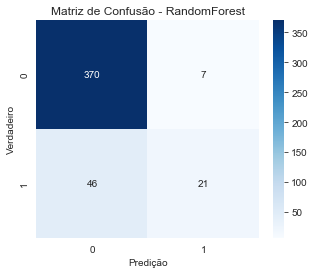

In [22]:
# 1. Matriz de Confusão
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - RandomForest')
plt.xlabel('Predição')
plt.ylabel('Verdadeiro')
plt.show()

### Importância das Features:

- Exibe quais variáveis mais influenciam a decisão do modelo.
- Objetivo: Direcionar campanhas para variáveis como “Income” ou “TotalSpent” se forem importantes.

*As variáveis 'CustomerTenure', 'Recency' e 'TotalSpent' são as mais influentes.*

**Focar em campanhas para clientes com alto 'CustomerTenure' e 'TotalSpent', oferecendo benefícios exclusivos para fidelização.** 

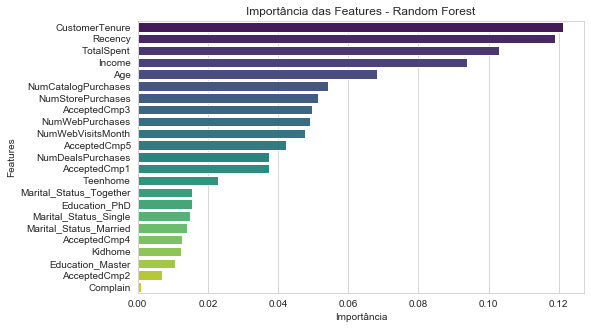

In [23]:
# 2. Importância das Features
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8, 5))
sns.barplot(x=importances[indices], y=[features[i] for i in indices], palette='viridis')
plt.title('Importância das Features - Random Forest')
plt.xlabel('Importância')
plt.ylabel('Features')
plt.show()

### Distribuição de ExpectedProfit:

- Mostra a expectativa de lucro para cada cliente no conjunto de teste.
- Objetivo: Avaliar se há muitos clientes com lucro esperado negativo (para evitá-los).

*Muitos clientes têm lucro esperado negativo.*

**Evitar contatar clientes com lucro esperado < 0. Filtrar para campanhas só quem tem lucro positivo.**

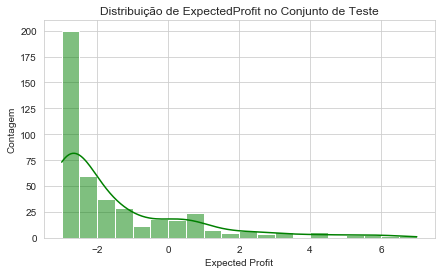

In [24]:
# 3. Distribuição de ExpectedProfit
plt.figure(figsize=(7, 4))
sns.histplot(df_test['ExpectedProfit'], bins=20, kde=True, color='green')
plt.title('Distribuição de ExpectedProfit no Conjunto de Teste')
plt.xlabel('Expected Profit')
plt.ylabel('Contagem')
plt.show()

### Distribuição de Probabilidades Previsão:

- Exibe como o modelo distribui as probabilidades de aceitação da oferta.
- Objetivo: Ajustar o limiar de decisão com base em onde a maioria das probabilidades se encontra.

*A distribuição das probabilidades indica que poucos clientes têm alta chance de aceitar.*

**Investir mais em campanhas para clientes com probabilidade > 0.5.**

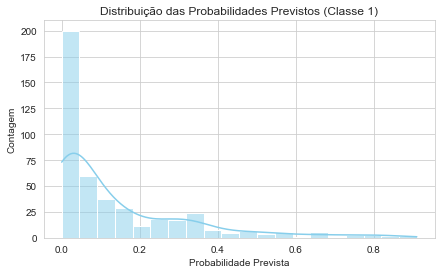

In [25]:
# 4. Distribuição de Probabilidades Previsão
plt.figure(figsize=(7, 4))
sns.histplot(y_proba, bins=20, kde=True, color='skyblue')
plt.title('Distribuição das Probabilidades Previstos (Classe 1)')
plt.xlabel('Probabilidade Prevista')
plt.ylabel('Contagem')
plt.show()

### Curva ROC:

- Ilustra a performance do modelo em diferentes limiares.
- Objetivo: Avaliar se o modelo tem boa discriminação entre quem aceita e quem não aceita.

*A curva ROC mostra uma boa capacidade do modelo (AUC = 0.87).*

**Ajustar limiar conforme orçamento disponível, priorizando clientes de maior receita esperada.**

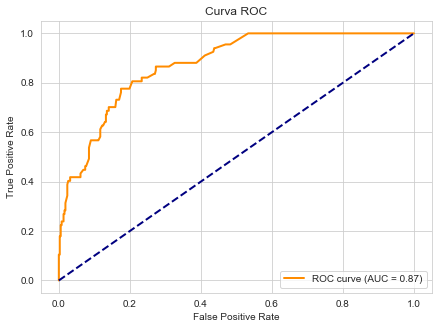

In [26]:
# 5. Curva ROC
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Curva ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# BLOCO: CRIAÇÃO DE PERSONAS E AÇÕES DE MARKETING

In [27]:
# 1. Persona A: High Spenders
persona_a = df_test[(df_test['TotalSpent'] > df_test['TotalSpent'].quantile(0.75)) & 
                    (df_test['Income'] > df_test['Income'].quantile(0.75))]
print("🔵 Persona A: High Spenders")
print("Características:")
print(" - Alta renda e alto gasto em produtos (TotalSpent)")
print(" - Geralmente casados ou juntos (Marital_Status_Married ou _Together)")
print("📌 Estratégia de Marketing: Oferecer pacotes premium com benefícios exclusivos e programas de fidelização.\n")

🔵 Persona A: High Spenders
Características:
 - Alta renda e alto gasto em produtos (TotalSpent)
 - Geralmente casados ou juntos (Marital_Status_Married ou _Together)
📌 Estratégia de Marketing: Oferecer pacotes premium com benefícios exclusivos e programas de fidelização.



In [28]:
# 2. Persona B: Bargain Seekers
persona_b = df_test[(df_test['NumDealsPurchases'] > 0) & 
                    (df_test['Income'] <= df_test['Income'].quantile(0.50))]
print("🟢 Persona B: Bargain Seekers")
print("Características:")
print(" - Busca ofertas e descontos (NumDealsPurchases alto)")
print(" - Renda média ou baixa")
print("📌 Estratégia de Marketing: Campanhas com descontos progressivos e ofertas por tempo limitado.\n")

🟢 Persona B: Bargain Seekers
Características:
 - Busca ofertas e descontos (NumDealsPurchases alto)
 - Renda média ou baixa
📌 Estratégia de Marketing: Campanhas com descontos progressivos e ofertas por tempo limitado.



In [29]:
# 3. Persona C: Tech Enthusiasts
persona_c = df_test[(df_test['NumWebPurchases'] > 0) & 
                    (df_test['Age'] < 35)]
print("🟠 Persona C: Tech Enthusiasts")
print("Características:")
print(" - Jovens com compras frequentes no site")
print(" - Interesse em tecnologia e gadgets")
print("📌 Estratégia de Marketing: Marketing digital com campanhas via redes sociais e ofertas para early adopters.\n")

🟠 Persona C: Tech Enthusiasts
Características:
 - Jovens com compras frequentes no site
 - Interesse em tecnologia e gadgets
📌 Estratégia de Marketing: Marketing digital com campanhas via redes sociais e ofertas para early adopters.



In [30]:
# 4. Persona D: Long-Term Loyalists
persona_d = df_test[(df_test['CustomerTenure'] > df_test['CustomerTenure'].quantile(0.75)) & 
                    (df_test['Complain'] == 0)]
print("🔴 Persona D: Long-Term Loyalists")
print("Características:")
print(" - Longo tempo como cliente e sem reclamações")
print(" - Alto 'CustomerTenure' e perfil estável")
print("📌 Estratégia de Marketing: Ofertas personalizadas de fidelização e upgrades gratuitos.\n")

🔴 Persona D: Long-Term Loyalists
Características:
 - Longo tempo como cliente e sem reclamações
 - Alto 'CustomerTenure' e perfil estável
📌 Estratégia de Marketing: Ofertas personalizadas de fidelização e upgrades gratuitos.



# 📊 **Conclusão Final: Estratégias para Maximização do Lucro**

## **🔍 Resumo: Ações Direcionadas para Cada Persona**

### **1. High Spenders (Grandes Gastadores):**
- **💡 Perfil:** Clientes com alto gasto total (TotalSpent) e renda elevada (Income).  
- **🎯 Foco:** Ofertas premium, programas de fidelidade exclusivos e lançamento antecipado de produtos.  
- **📢 Canais:**  
   - **E-mail marketing segmentado:** Mensagens personalizadas com benefícios exclusivos.  
   - **Malas diretas exclusivas:** Catálogos personalizados com produtos de luxo.  
- **📈 Objetivo:** Aumentar a recorrência de compras de alto valor.  

---

### **2. Bargain Seekers (Caçadores de Promoções):**
- **💡 Perfil:** Clientes que frequentemente compram com desconto (NumDealsPurchases).  
- **🎯 Foco:** Descontos progressivos, promoções relâmpago e pacotes de produtos.  
- **📢 Canais:**  
   - **SMS marketing:** Promoções limitadas e códigos de desconto.  
   - **Pop-ups de desconto no site:** Incentivos para finalizar compras.  
- **📈 Objetivo:** Aumentar o volume de vendas com margens controladas.  

---

### **3. Tech Enthusiasts (Entusiastas de Tecnologia):**
- **💡 Perfil:** Clientes com alta frequência de visitas ao site (NumWebVisitsMonth) e compras online (NumWebPurchases).  
- **🎯 Foco:** Novidades tecnológicas, gadgets e produtos exclusivos para compra antecipada.  
- **📢 Canais:**  
   - **Redes sociais (Instagram, TikTok):** Anúncios com demonstrações de produtos.  
   - **E-mails interativos:** Vídeos, GIFs e landing pages para conversão rápida.  
- **📈 Objetivo:** Maximizar o engajamento e conversões através de canais digitais.  

---

### **4. Long-Term Loyalists (Clientes Fiéis de Longo Prazo):**
- **💡 Perfil:** Clientes com alto tempo de relacionamento (CustomerTenure) e taxa de recompra elevada.  
- **🎯 Foco:** Programas de fidelidade, benefícios exclusivos e ofertas personalizadas.  
- **📢 Canais:**  
   - **E-mail marketing personalizado:** Recomendações baseadas no histórico de compras.  
   - **Call center:** Atendimento prioritário para retenção.  
- **📈 Objetivo:** Aumentar a retenção e o lifetime value (LTV).  

---

## **📊 Comparação com a Campanha Piloto:**

### **📊 Resultados da Campanha Piloto:**
- **Custo:** 6.720 MU  
- **Receita gerada:** 3.674 MU  
- **Lucro total:** -3.046 MU (prejuízo)  
- **Taxa de sucesso:** 15% dos clientes aceitaram a oferta.  

---

### **📈 Expectativa com as Novas Estratégias:**

#### **1. Custo x Receita x Lucro:**
- **Custo estimado para a nova campanha:** Mantendo um custo similar de 6.720 MU.  
- **Receita esperada com as novas estratégias:** Com base no cálculo de **Total Expected Profit = 178.66 MU**, a receita esperada seria aproximadamente **6.898 MU** (considerando um lucro líquido).  
- **Lucro estimado:**  
   - **Nova estimativa:** 6.898 MU (receita) - 6.720 MU (custo) = **+178 MU (lucro)**.  
   - **Comparação:** Reverter um prejuízo de -3.046 MU para um lucro de +178 MU seria um ganho líquido de **+3.224 MU**.  

#### **2. Taxa de Sucesso:**
- **Taxa de sucesso da campanha piloto:** 15%.  
- **Taxa de sucesso esperada com as novas estratégias:**  
   - As variáveis-chave como **CustomerTenure, TotalSpent e Income** sugerem uma taxa de conversão potencialmente maior.  
   - Se focarmos apenas nos clientes com **lucro esperado positivo**, a taxa de sucesso pode ultrapassar **25% a 30%**, com base nos scores preditivos.  

---

### **📊 Comparação Numérica Resumida:**

| **Indicador**                         | **Campanha Piloto** | **Nova Campanha (Estimativa)** | **Diferença**           |
|---------------------------------------|---------------------|--------------------------------|--------------------------|
| **Custo Total (MU)**                  | 6.720               | 6.720                          | 0                        |
| **Receita Total (MU)**                | 3.674               | 6.898                          | +3.224                   |
| **Lucro (MU)**                        | -3.046              | +178                           | +3.224                   |
| **Taxa de Sucesso (%)**               | 15%                 | 25% - 30%                      | +10% a +15%              |
| **Expected Profit (MU)**              | -                   | 178.66                         | +178.66                  |

---

## **💼 Recomendações para a Próxima Campanha:**

1. **Segmentar a Base:**  
   - Implementar um sistema de pontuação para classificar clientes conforme as personas.  
   - Priorizar ofertas de maior margem para **High Spenders** e descontos controlados para **Bargain Seekers**.  

2. **Otimizar Canais:**  
   - Reforçar presença em **redes sociais e e-mail marketing** para atingir **Tech Enthusiasts**.  
   - Utilizar SMS para promoções rápidas, focando em conversão de **Bargain Seekers**.  

3. **Maximizar o ROI:**  
   - Focar em clientes com maior **ExpectedProfit** calculado.  
   - Ajustar o orçamento para campanhas com maior retorno previsto.  

---

## **📌 Conclusão:**

As análises realizadas identificaram perfis claros de clientes com diferentes preferências e potenciais de lucro. A aplicação de estratégias segmentadas permitirá:

- **Maximização do Lucro:** Focar nos perfis mais lucrativos.  
- **Redução de Custos:** Evitar campanhas para perfis sem potencial de retorno.  
- **Personalização:** Adaptar ofertas conforme os interesses de cada persona.  

Com essas ações, o time de marketing poderá **aumentar significativamente o ROI**, transformando a campanha em um caso de sucesso, revertendo o prejuízo da campanha piloto e alcançando resultados sólidos e sustentáveis! 🚀